In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('airlines_flights_data (1).csv')

In [4]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [8]:
df.shape

(300153, 12)

In [9]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop('index', axis=1, inplace=True)

In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# **Data Visualization**

Text(0.5, 1.0, 'Price Distribution')

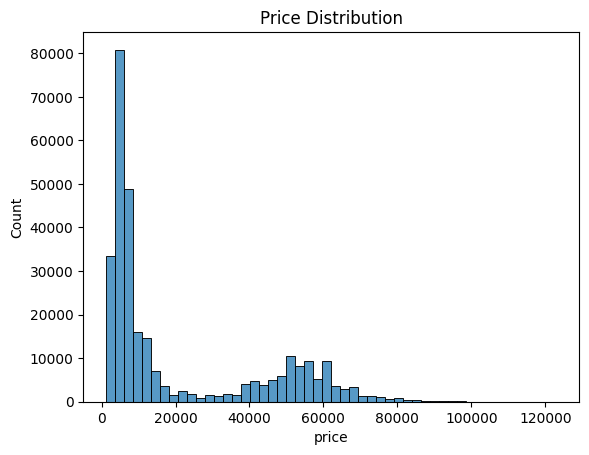

In [13]:
# price Distribution
sns.histplot(data=df, x='price', bins=50)
plt.title('Price Distribution')

Text(0.5, 1.0, 'Airline Distribution')

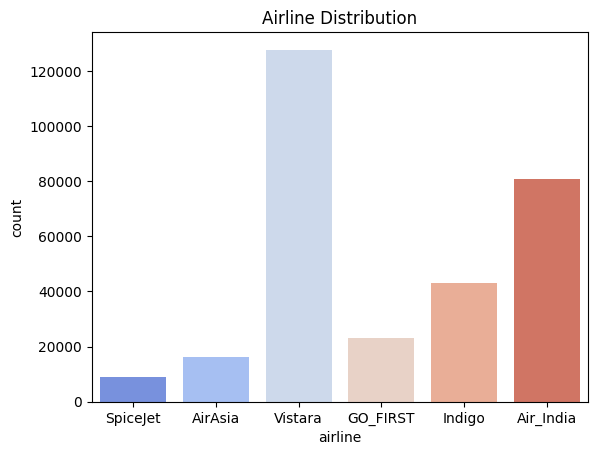

In [14]:
# airline Distribution
sns.countplot(data=df, x='airline', palette='coolwarm')
plt.title('Airline Distribution')

In [15]:
# Select Categorical Columns 
cat_cols = df.select_dtypes(include=['object'])

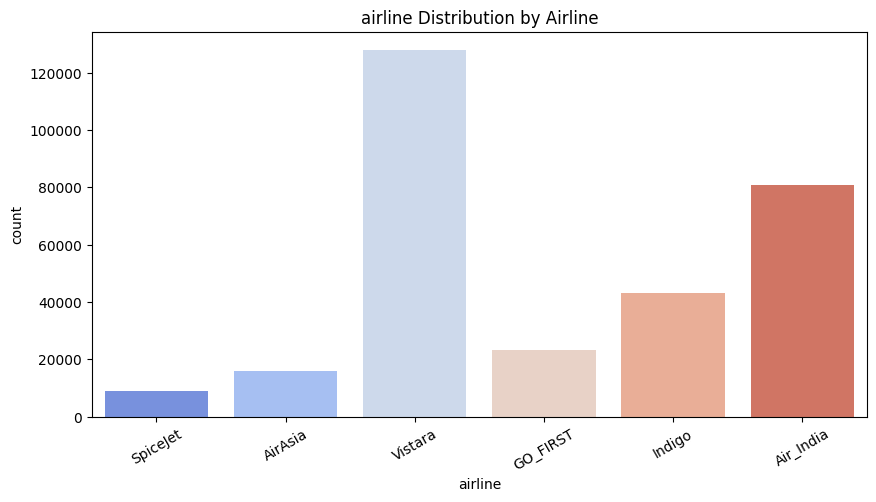

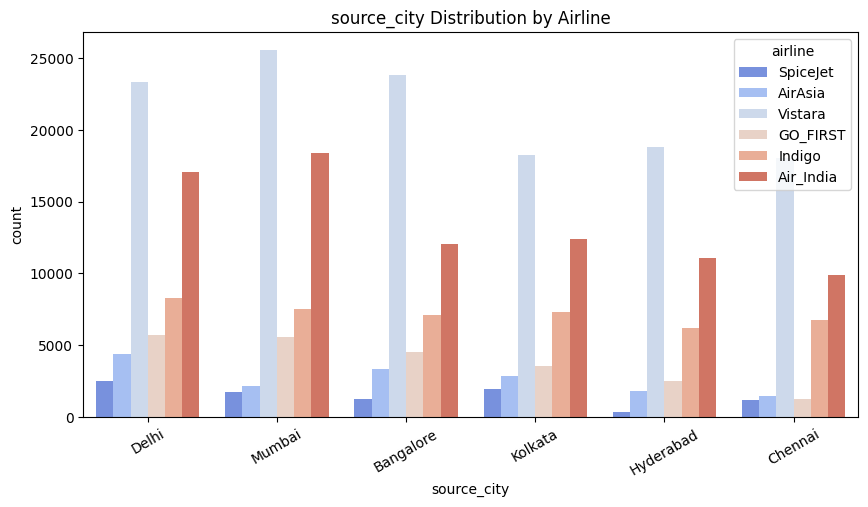

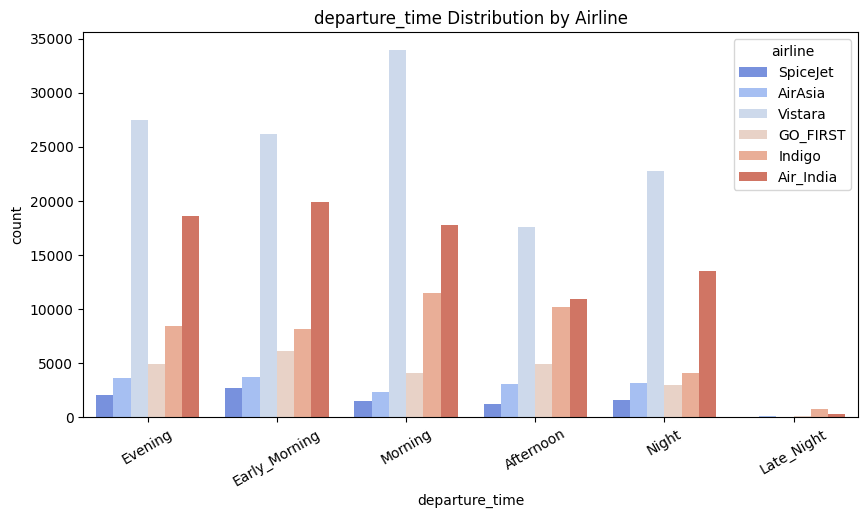

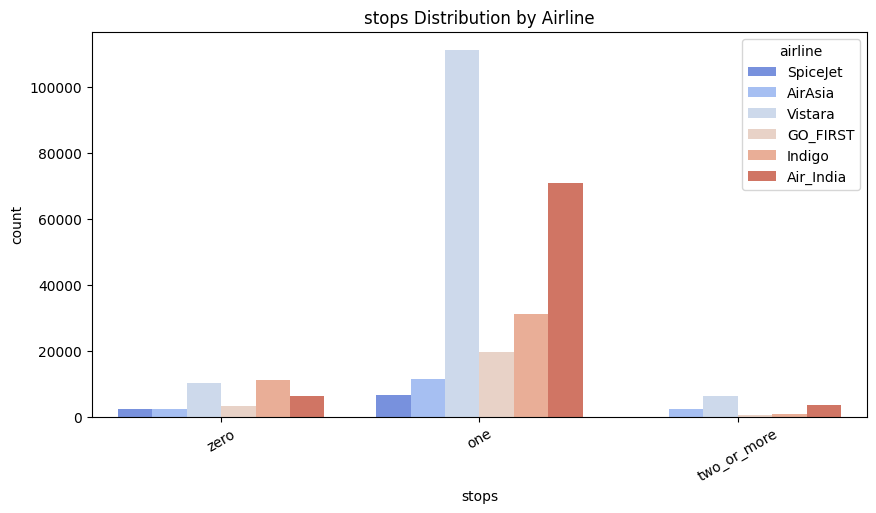

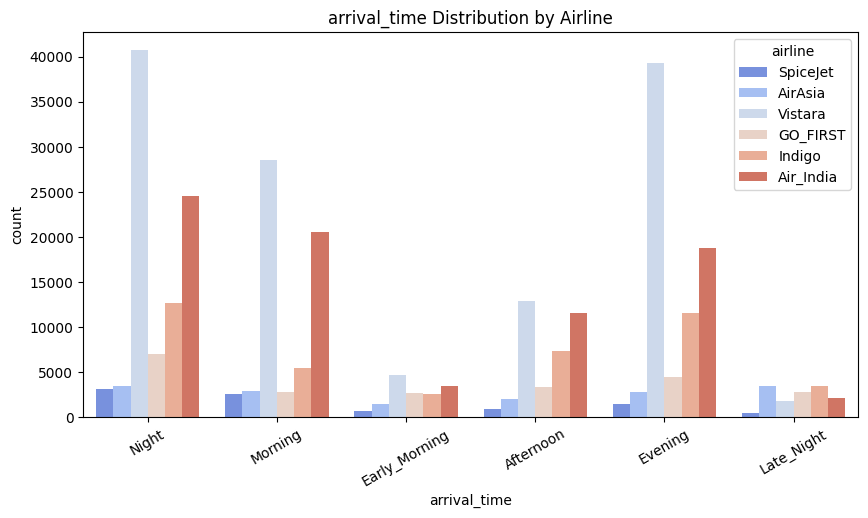

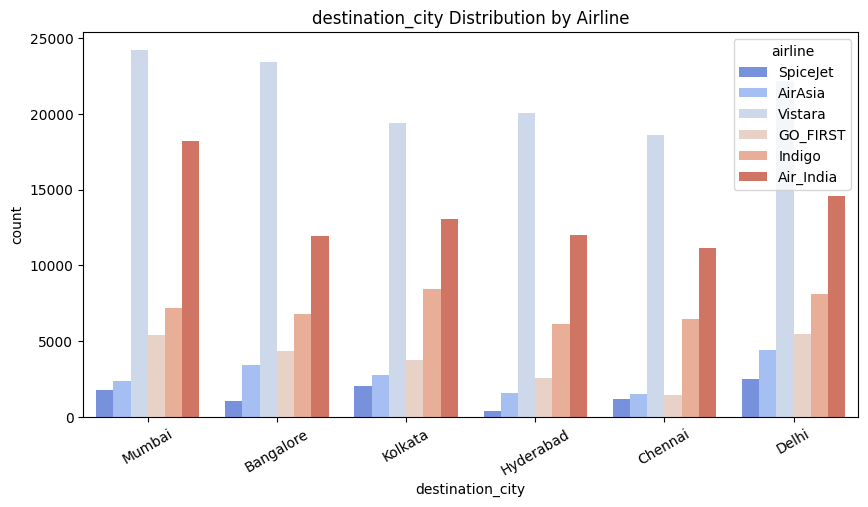

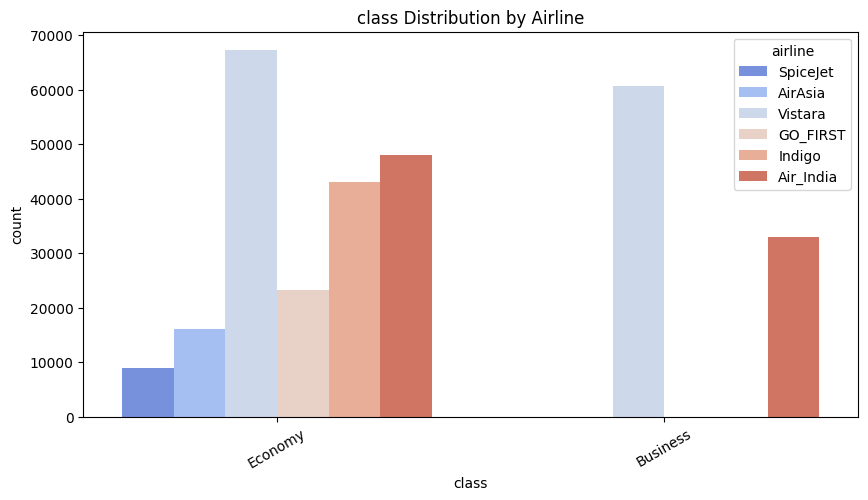

In [16]:
# Categorical Columns Distribution
for col in cat_cols:
    if col == 'flight':
        continue
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue='airline', palette='coolwarm')
    plt.title(f'{col} Distribution by Airline')
    plt.xticks(rotation=30)

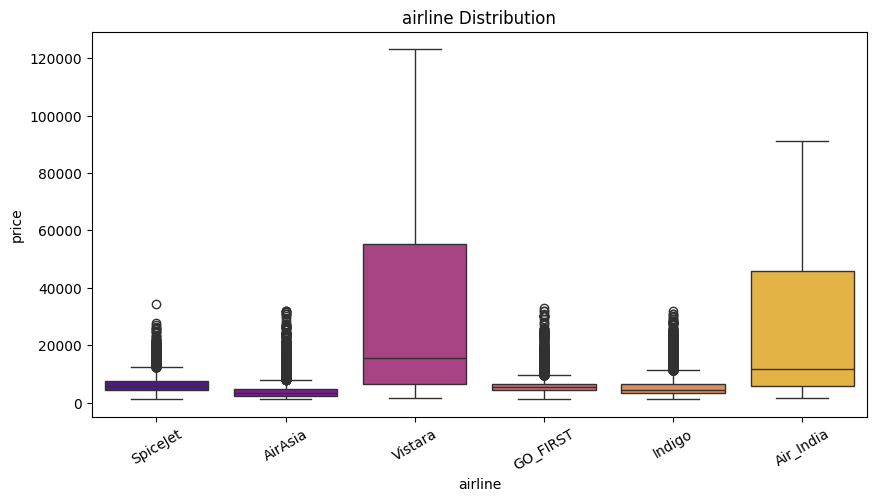

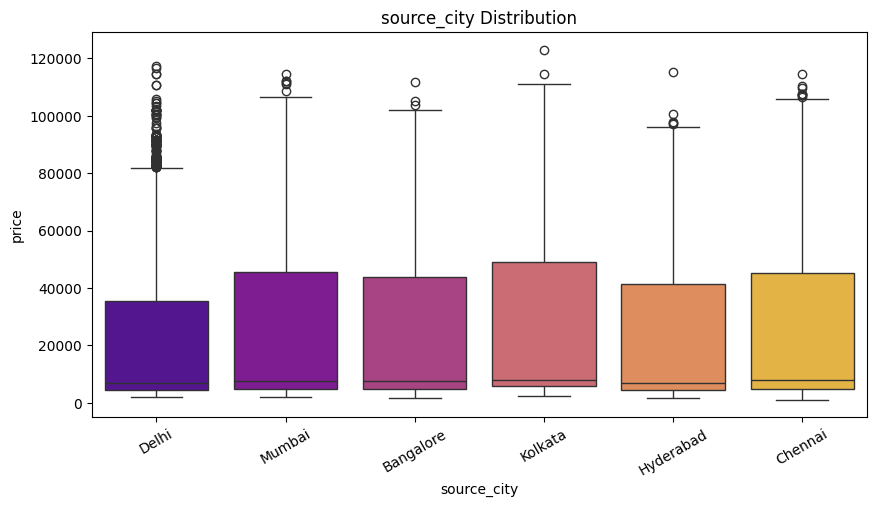

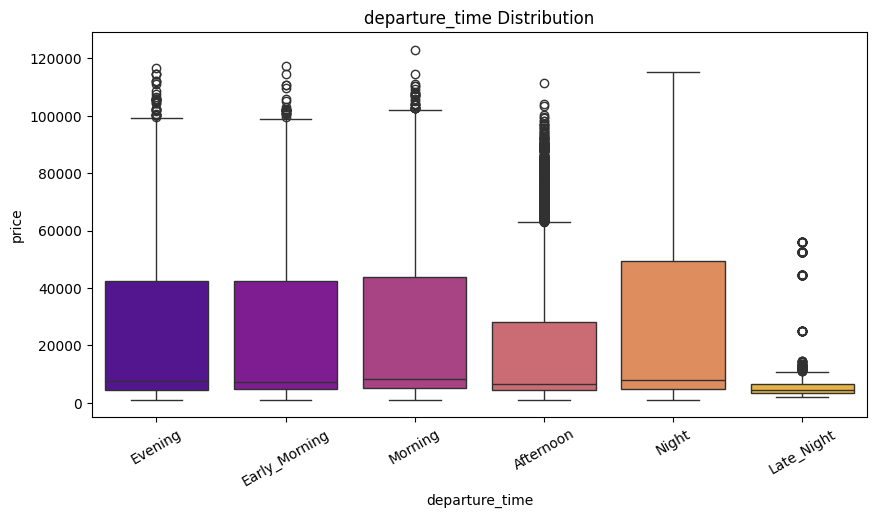

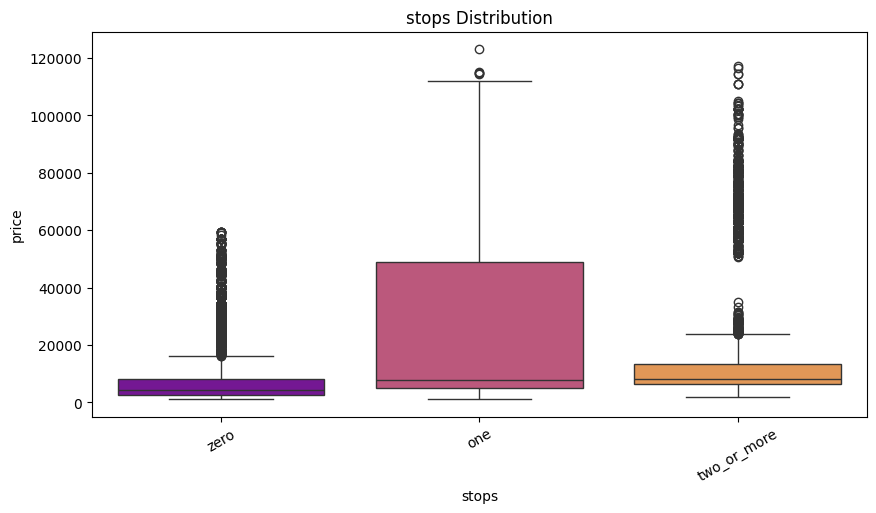

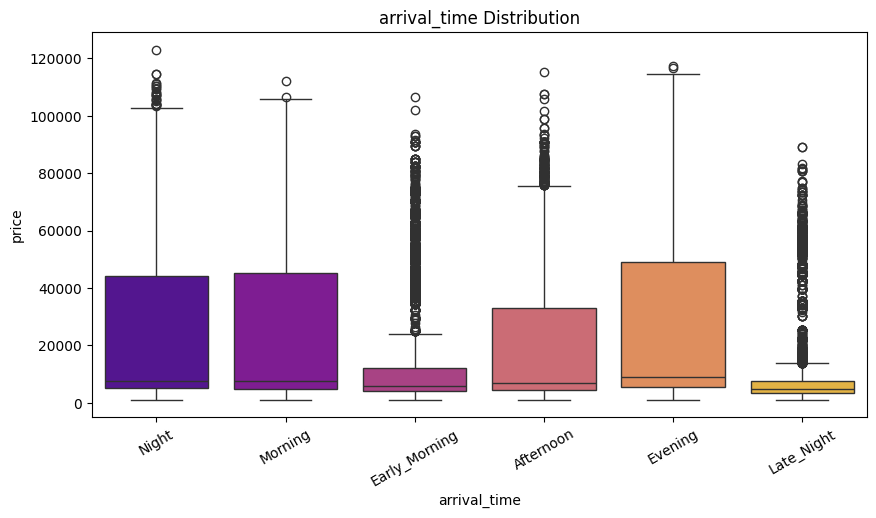

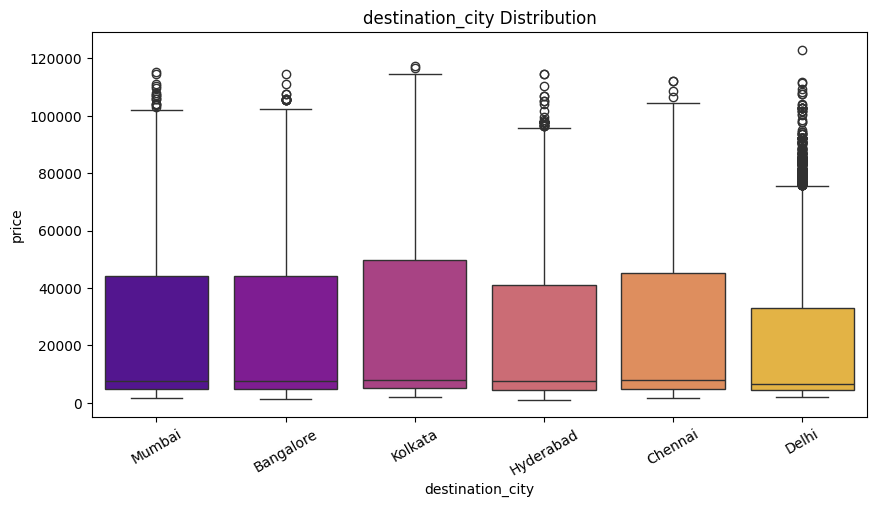

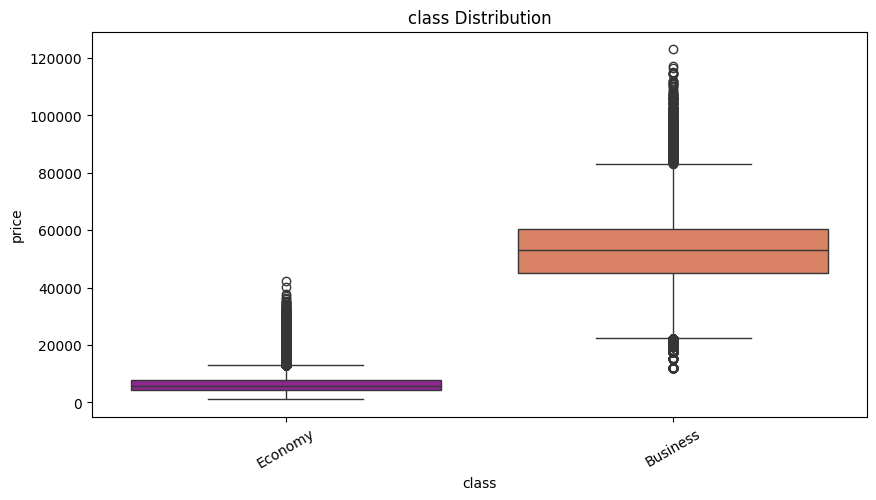

In [17]:
# Boxplot Visualization by Category
for col in cat_cols:
    if col == 'flight':
        continue
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=col, y='price', palette='plasma')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)

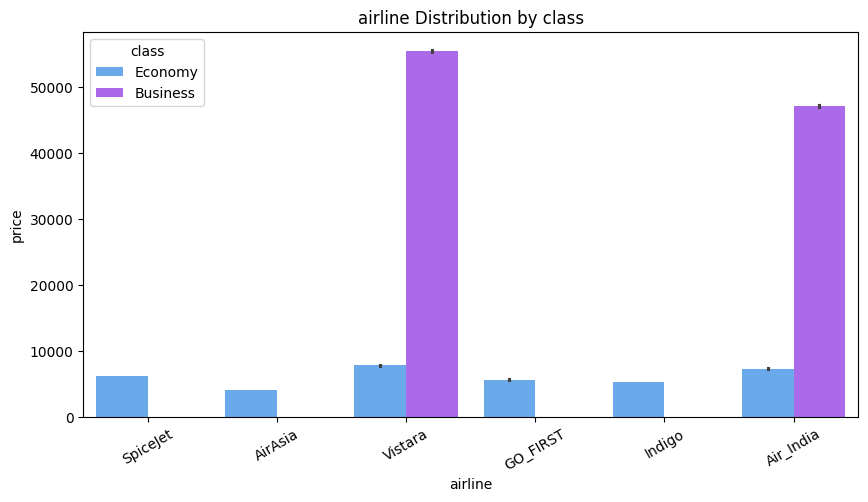

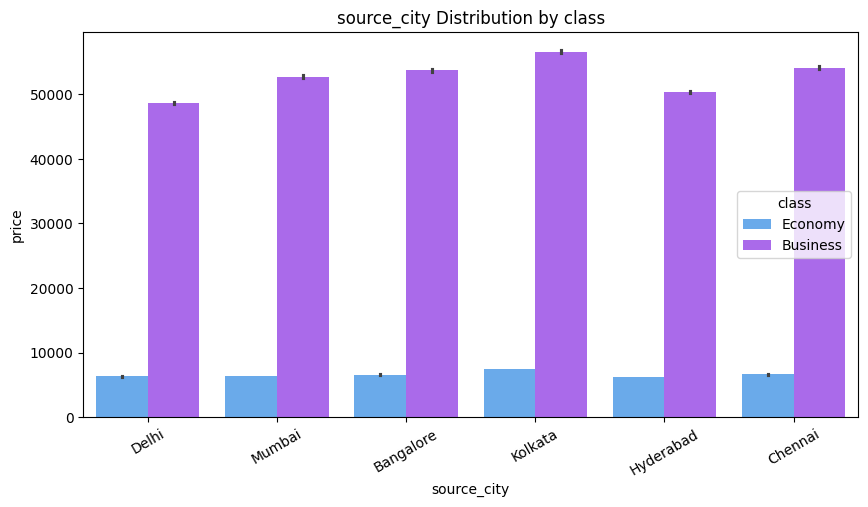

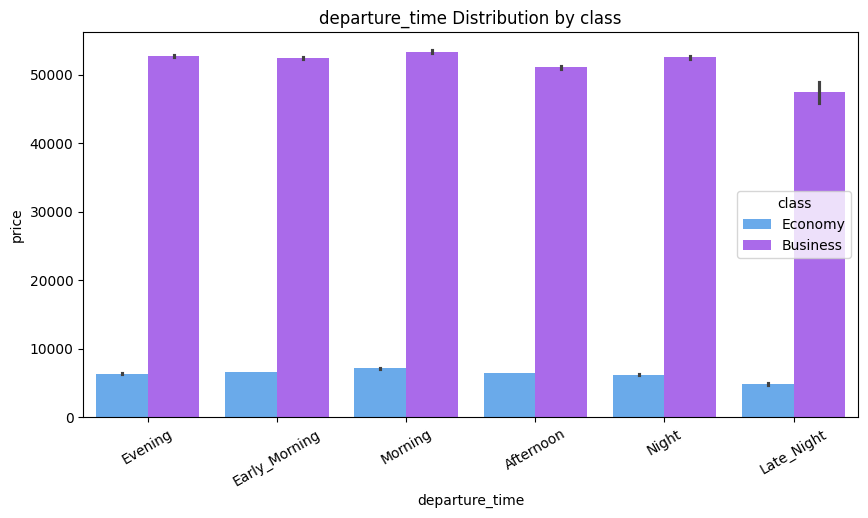

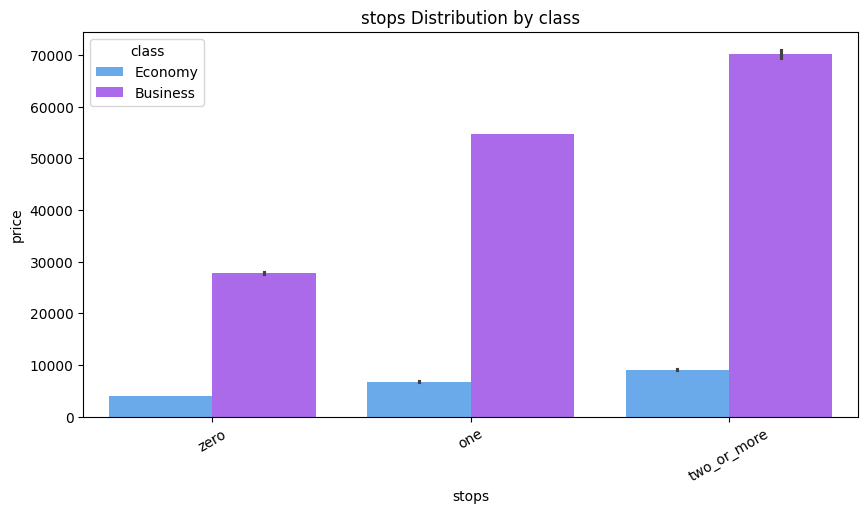

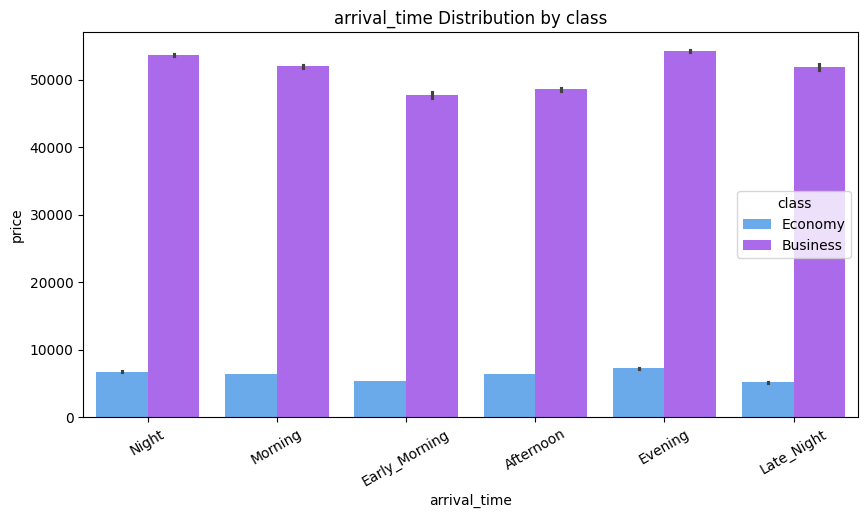

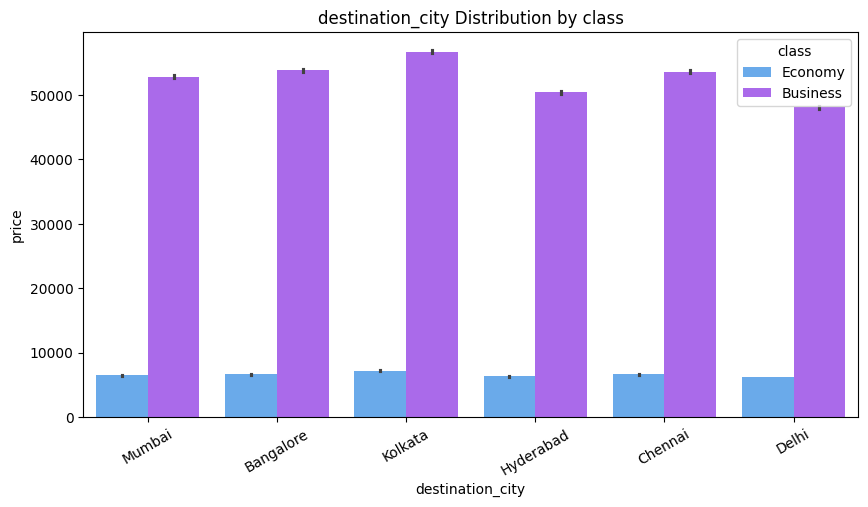

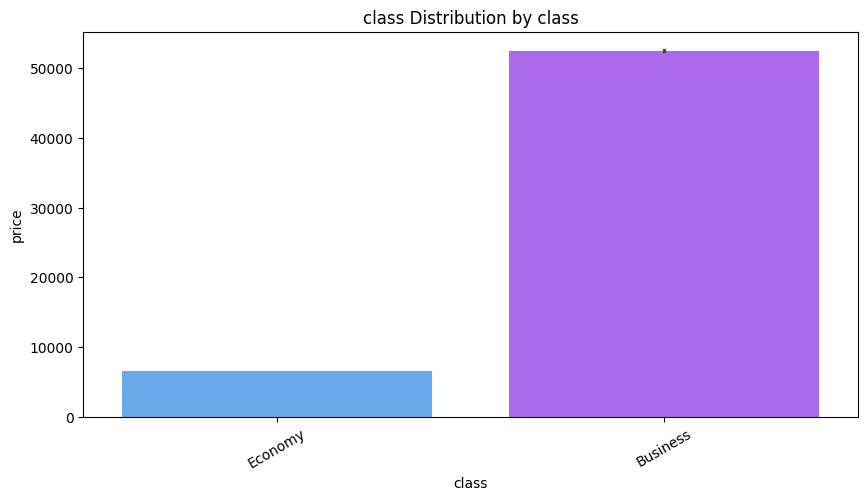

In [18]:
# Barplot Visualization by Category
for col in cat_cols:
    if col == 'flight':
        continue
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=col, y='price', hue='class', palette='cool')
    plt.title(f'{col} Distribution by class')
    plt.xticks(rotation=30)

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'duration'), Text(0, 1.5, 'days_left'), Text(0, 2.5, 'price')])

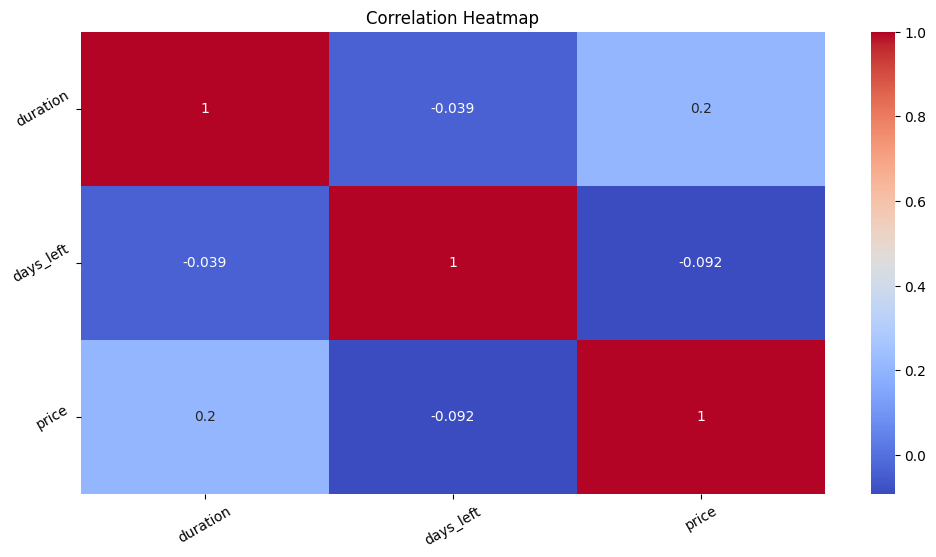

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=30)
plt.yticks(rotation=30)

# **Data Preprocessing**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Apply Label Encoding
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# **Predictive Modeling**

## Regression

In [22]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

In [23]:
X = df.drop('price', axis=1)
y = df['price']

In [24]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Models
xgb = XGBRegressor()
lr = LinearRegression()

In [26]:
# Train and Predictions
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [27]:
# Train and Predictions
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [28]:
# R2 and Root Mean Square Error
print('R2:', r2_score(y_test, lr_pred))
print('RMSE:', root_mean_squared_error(y_test, lr_pred))

R2: 0.9046726002838563
RMSE: 7004.414274627438


In [29]:
# R2 and Root Mean Square Error
print('R2:', r2_score(y_test, xgb_pred))
print('RMSE:', root_mean_squared_error(y_test, xgb_pred))

R2: 0.9824963212013245
RMSE: 3001.427734375


Text(0, 0.5, 'Y Test')

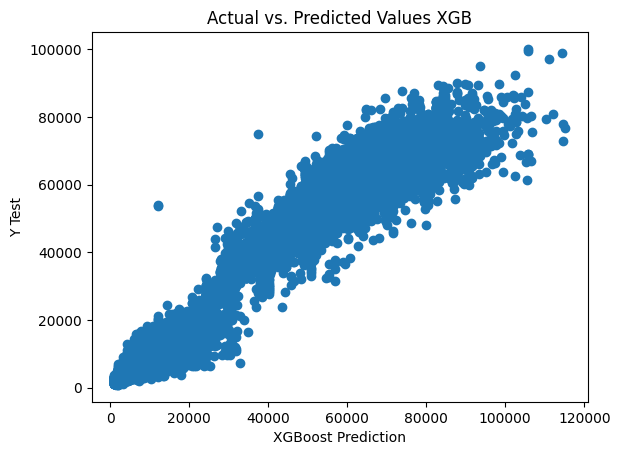

In [30]:
plt.scatter(y_test, xgb_pred)
plt.title('Actual vs. Predicted Values XGB')
plt.xlabel('XGBoost Prediction')
plt.ylabel('Y Test')

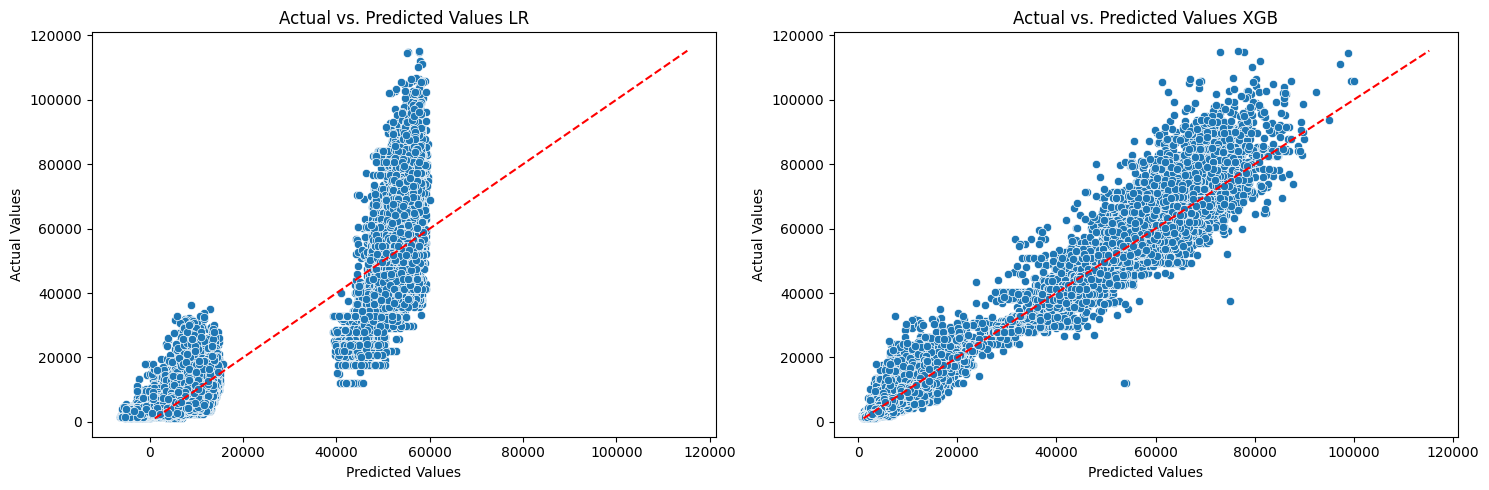

In [31]:
# Compareing actual target values (y_test) with predictions from two models:
# - Linear Regression (left subplot)
# - XGBoost Regressor (right subplot)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Actual vs. Predicted Plot LR
sns.scatterplot(x=lr_pred, y=y_test, ax=axs[0])
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[0].set_title('Actual vs. Predicted Values LR')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Actual Values')

# Plot 2: Actual vs. Predicted Plot XGB
sns.scatterplot(x=xgb_pred, y=y_test, ax=axs[1])
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[1].set_title('Actual vs. Predicted Values XGB')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Actual Values')

plt.tight_layout()

## Classification

In [32]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
X = df.drop('airline', axis=1)
y = df['airline']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Train and Predictions
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [35]:
# Train and Predictions
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [36]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[ 4822     0     0     0     0     0]
 [    0 24376     0     0     0     0]
 [    0     0  6930     0     0     0]
 [    0     0     0 13091     0     0]
 [    0     0     0     0  2674     1]
 [    0     0     0     0     0 38152]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4822
           1       1.00      1.00      1.00     24376
           2       1.00      1.00      1.00      6930
           3       1.00      1.00      1.00     13091
           4       1.00      1.00      1.00      2675
           5       1.00      1.00      1.00     38152

    accuracy                           1.00     90046
   macro avg       1.00      1.00      1.00     90046
weighted avg       1.00      1.00      1.00     90046



In [37]:
print(confusion_matrix(y_test, xgb_pred))
print('\n')
print(classification_report(y_test, xgb_pred))

[[ 4821     0     1     0     0     0]
 [    0 24376     0     0     0     0]
 [    0     0  6930     0     0     0]
 [    0     0     0 13091     0     0]
 [    0     0     0     0  2672     3]
 [    0     0     0     0     0 38152]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4822
           1       1.00      1.00      1.00     24376
           2       1.00      1.00      1.00      6930
           3       1.00      1.00      1.00     13091
           4       1.00      1.00      1.00      2675
           5       1.00      1.00      1.00     38152

    accuracy                           1.00     90046
   macro avg       1.00      1.00      1.00     90046
weighted avg       1.00      1.00      1.00     90046

